In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df=pd.read_csv('soccer.csv')
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [5]:
df.shape

(660, 15)

In [6]:
df.rename(columns ={"Player Names" : "Player_Names"}, inplace = True   )
df.rename(columns ={"Substitution " : "Substitution"}, inplace = True   )
df.rename(columns ={"xG Per Avg Match" : "xG_Per_Avg_Match"}, inplace = True   )
df.rename(columns ={"Shots Per Avg Match" : "Shots_Per_Avg_Match"}, inplace = True   )
df.rename(columns ={"On Target Per Avg Match" : "On_Target_Per_Avg_Match"}, inplace = True   )

# Q1: What is the total number of goals scored in the entire dataset?




In [7]:
df1 = df.copy()

In [8]:
totalGoals = df['Goals'].sum()
print(totalGoals,"total number of goals scored in the entire dataset ")

7795 total number of goals scored in the entire dataset 


# Q2: Which player has scored the most goals as a substitution

In [9]:


# Filter the data for rows where the player was substituted
substitution_goals = df[df['Substitution'] > 1]

# Find the player with the most goals as a substitution
result = substitution_goals.loc[substitution_goals['Goals'].idxmax(), 'Player_Names']

print("Player with the most goals as a substitution:", result)

Player with the most goals as a substitution: Lionel Messi


# Q3: Find the top 5 players with the most number of goals scored. Also find the total number of goals scored by them

In [10]:

# Group the dataset by player names and sum the goals for each player and sort the values and use head function to get top 5 

result = df.groupby('Player_Names')['Goals'].sum().reset_index().sort_values(by = 'Goals',ascending = False).head(5)
result




,Player_Names,Goals
259,Lionel Messi,135
93,Cristiano Ronaldo,128
368,Robert Lewandowski,127
86,Ciro Immobile,107
273,Luis Suarez,95


In [11]:
# Finding the total number of goals scored by team

finalout = result['Goals'].sum()
print('Total number of goals scored by the top 5 players:',finalout)



Total number of goals scored by the top 5 players: 592


# Q4: What are the top 10 countries with the most number of players in the dataset?

In [12]:
# I have just Group the dataset by country and count the number of players in each country

country_play_count = df['Country'].value_counts().reset_index()
country_play_count.columns = ['Country', 'Number_of_Players']


# Sorting the values
country_play_count.sort_values(by = 'Number_of_Players', ascending = False).head(10)


,Country,Number_of_Players
0,Spain,100
1,Italy,100
2,Germany,100
3,Brazil,100
4,England,80
5,France,60
6,USA,40
7,Portugal,40
8,Netherlands,40


# Q5: # Q1. Create a new dataframe after removing the ourliers for Mins Column in the dataset (conside the upper quantile to be 99 percentile and the lower quantile to be 1 percentile.). After that Find the difference in the number of rows?

* Difference is df.shape(only rows) - df.shape(rows of filtered data only)

In [13]:

# Calculate the 1st and 99th percentiles for the "Mins" column
lower_quantile = df['Mins'].quantile(0.01)
upper_quantile = df['Mins'].quantile(0.99)

# Create a new DataFrame by filtering the original DataFrame to include only non-outliers
filtered = df[(df['Mins'] >= lower_quantile) & (df['Mins'] <= upper_quantile)]

# Calculating the difference in the number of rows
final = df.shape[0] - filtered.shape[0]

print("Difference in the number of rows after removing outliers:", final)


Difference in the number of rows after removing outliers: 14


# Q6: Which top 5 players have scored the maximum number of goals throughout all the years? Display them in descending order

In [14]:

# Group the dataset by player names and sum the goals for each player
player_goals = df.groupby('Player_Names')['Goals'].sum().reset_index()

# i have sort the values
top_players = player_goals.sort_values(by='Goals', ascending=False)

# Top 10 players
top_5_players = top_players.head(5)

print("Top 5 players with the maximum number of goals scored throughout all the years:")
print(top_5_players)



Top 5 players with the maximum number of goals scored throughout all the years:
           Player_Names  Goals
259        Lionel Messi    135
93    Cristiano Ronaldo    128
368  Robert Lewandowski    127
86        Ciro Immobile    107
273         Luis Suarez     95


# Q7. Using Bar Plot show in which year has Cristiano Ronaldo scored the most number of goals?

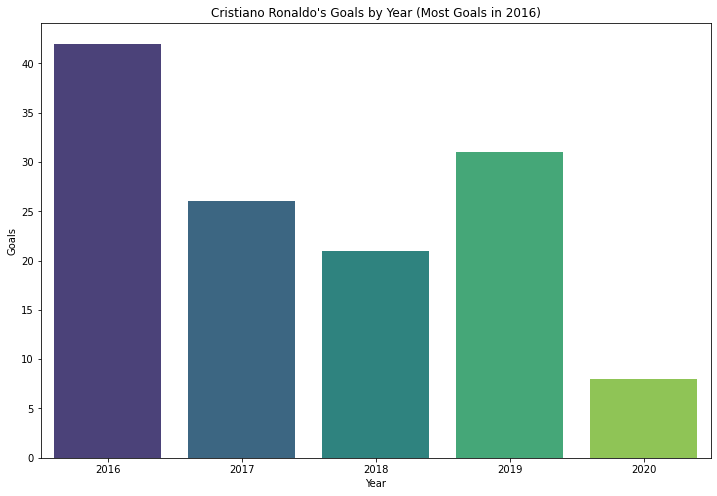

In [15]:

# I have Filter the dataset to include only rows where the player is Cristiano Ronaldo
ronaldo_data_year = df[df['Player_Names'] == 'Cristiano Ronaldo'].groupby('Year')['Goals'].sum().reset_index()
# To find the most number of goals by year
final = ronaldo_data_year.loc[ronaldo_data_year['Goals'].idxmax()]

plt.figure(figsize = (12,8))
sns.barplot(data = ronaldo_data_year, x ='Year', y = 'Goals',palette='viridis' )
plt.title(f"Cristiano Ronaldo's Goals by Year (Most Goals in {final['Year']})")
plt.show()

# Q8. In the year 2019 who has more Goals between Ronaldo and Messi? 
- First print them normally 
- Display the comparison using a bar plot

In [16]:
# - First print them normally 
# I have Filter the dataset to include only data for the year 2019
data_goals = df[df['Year'] == 2019].groupby('Player_Names')['Goals'].sum()
ronaldo_data = data_goals.get("Cristiano Ronaldo",0)
messi_data = data_goals.get("Lionel Messi",0)
print("Goals scored by Cristiano Ronaldo in 2019:",messi_data)
print("Goals scored by Lionel Messi:",ronaldo_data)


Goals scored by Cristiano Ronaldo in 2019: 25
Goals scored by Lionel Messi: 31


# Q9: Using Pie Chart show the amount of data various Countries are containing in this dataset(use the Country Columns Display the percentage of data as well in the pie chart

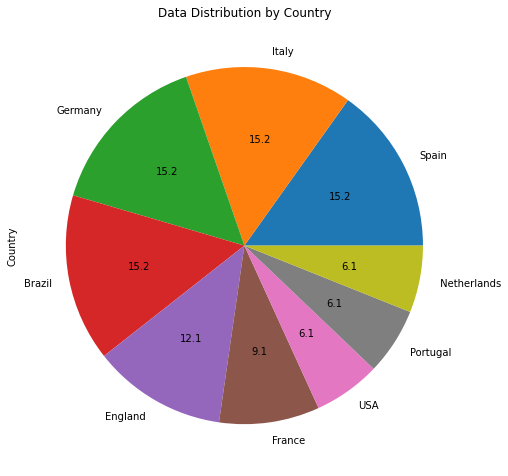

In [17]:

# Count the number of data points for each country
country_data_count = df['Country'].value_counts()  

# Create a pie char
Country_Counts =df['Country'].value_counts()
plt.figure(figsize=(8, 10))

Country_Counts.plot(kind = 'pie',autopct = '%.1f')
plt.title("Data Distribution by Country")
plt.show()

# Q10: Display a Heatmap  to show the correlation between the columns in the dataset. The heatmap should have the value of the correlation printed within the boxes.

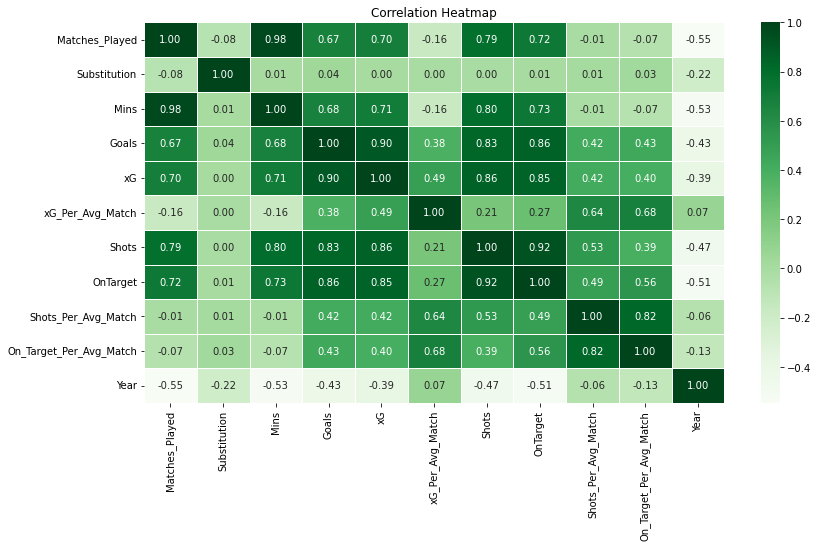

In [18]:

# Assuming you have loaded your dataset into a DataFrame named 'df'

# Calculate the correlation matrix
correlation_Heatmap = df.corr()

# Create a heatmap
plt.figure(figsize=(13, 7))
sns.heatmap(correlation_Heatmap, annot=True, fmt=".2f", cmap="Greens",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [19]:
df.corr()

,Matches_Played,Substitution,Mins,Goals,xG,xG_Per_Avg_Match,Shots,OnTarget,Shots_Per_Avg_Match,On_Target_Per_Avg_Match,Year
Matches_Played,1.000000,-0.080422,0.981231,0.668750,0.695411,-0.163790,0.788192,0.722838,-0.005875,-0.066603,-0.546415
Substitution,-0.080422,1.000000,0.006075,0.039685,0.004738,0.001942,0.001490,0.007776,0.009738,0.029030,-0.219274
Mins,0.981231,0.006075,1.000000,0.678621,0.708465,-0.160581,0.796597,0.728925,-0.011351,-0.071387,-0.525116
Goals,0.668750,0.039685,0.678621,1.000000,0.903190,0.382411,0.833886,0.858692,0.416283,0.432630,-0.434011
xG,0.695411,0.004738,0.708465,0.903190,1.000000,0.490747,0.856190,0.852641,0.420086,0.397934,-0.386874
xG_Per_Avg_Match,-0.163790,0.001942,-0.160581,0.382411,0.490747,1.000000,0.205135,0.268344,0.640633,0.684667,0.074453
Shots,0.788192,0.001490,0.796597,0.833886,0.856190,0.205135,1.000000,0.923213,0.527506,0.391105,-0.469195
OnTarget,0.722838,0.007776,0.728925,0.858692,0.852641,0.268344,0.923213,1.000000,0.487439,0.558326,-0.512711
Shots_Per_Avg_Match,-0.005875,0.009738,-0.011351,0.416283,0.420086,0.640633,0.527506,0.487439,1.000000,0.819838,-0.063464
On_Target_Per_Avg_Match,-0.066603,0.029030,-0.071387,0.432630,0.397934,0.684667,0.391105,0.558326,0.819838,1.000000,-0.132174


# Q11: Which Country has the maximum median OnTarget Shots among all the Countries in the year 2020?

In [20]:
data_year =  df[df['Year'] == 2020]
data_year_index = data_year.groupby('Country')['OnTarget'].median().reset_index()
data_year_index = data_year_index.loc[data_year_index['OnTarget'].idxmax()]
print("Country with the maximum median OnTarget Shots in the year 2020:")
print()
print(data_year_index)

Country with the maximum median OnTarget Shots in the year 2020:

Country      Netherlands
OnTarget            25.5
Name: 0, dtype: object


# Q12. Who has the best average  Goals per minute?
* Consider only those players who have played more than 30 games
* Then Find Goals per minute
* Find Mean of Goals per minute and sort the values

In [21]:
# I have Filter the dataset to include only players who have played more than 30 games
Players_with30Gamnes = df[df['Matches_Played'] > 30]
Players_with30Gamnes["Goals_per_minute"] = Players_with30Gamnes['Goals'] / Players_with30Gamnes["Mins"]

# Finding the mean of the Goals_per_minute
mean_of_goals = Players_with30Gamnes['Goals_per_minute'].mean()

mean_of_goals = Players_with30Gamnes.sort_values(by = 'Goals_per_minute',ascending = False).iloc[0]
print(mean_of_goals['Player_Names'],"has the best average goals per minute")
print("And this is the Player with the best average Goals per Minute (with more than 30 games):")
print()
print( mean_of_goals)


Lionel Messi has the best average goals per minute
And this is the Player with the best average Goals per Minute (with more than 30 games):

Country                           Spain
League                          La Liga
Club                              (BAR)
Player_Names               Lionel Messi
Matches_Played                       32
Substitution                          2
Mins                               2910
Goals                                37
xG                                26.65
xG_Per_Avg_Match                   0.87
Shots                               179
OnTarget                             76
Shots_Per_Avg_Match                5.84
On_Target_Per_Avg_Match            2.48
Year                               2016
Goals_per_minute               0.012715
Name: 12, dtype: object


C:\Users\USER\AppData\Local\Temp/ipykernel_11276/2747927924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Players_with30Gamnes["Goals_per_minute"] = Players_with30Gamnes['Goals'] / Players_with30Gamnes["Mins"]


# Q 13. Which Player has the least and most number of missed shots in the dataset?
* Missed Shots=Shots-On Target

In [22]:

# I have Calculate missed shots for each player
df['Missed_Shots'] = df['Shots'] - df['OnTarget']

# And I have Find the player with the least missed shots
least_missed_shots = df.loc[df['Missed_Shots'].idxmin()]

# And I have Find the player with the most missed shots
most_missed_shots  = df.loc[df['Missed_Shots'].idxmax()]

print("Player with the least missed shots:")
print(least_missed_shots["Player_Names"] )

print("\nPlayer with the most missed shots:")
print(most_missed_shots["Player_Names"] )


Player with the least missed shots:
Esteban Burgos

Player with the most missed shots:
Cristiano Ronaldo


# Q14: How many countries have had players who played more than 35 matches? Create a bar plot to display the count for each country.

In [23]:
# Filter the dataset to include only players who have played more than 35 matches
matches_played = df[df['Matches_Played'] > 35]

# Count the number of unique countries in the filtered dataset
countries_count = matches_played['Country'].nunique()

print("Number of countries with players who played more than 35 matches:", countries_count)




Number of countries with players who played more than 35 matches: 5


In [24]:
country_counts = matches_played['Country'].value_counts()
country_counts

England    11
Spain       9
Italy       9
France      4
Brazil      1
Name: Country, dtype: int64

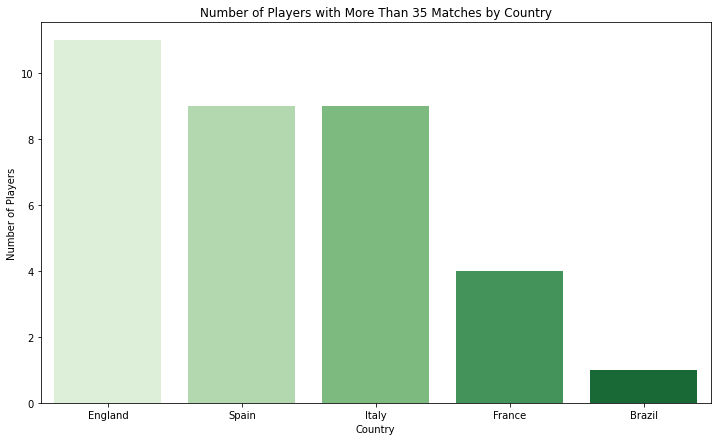

In [25]:
# I have Created a bar plot to display the count for each country
country_counts = matches_played['Country'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='Greens')
plt.title("Number of Players with More Than 35 Matches by Country")
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.show()

# Q15: Draw a Line Chart to show the comparison of the top 5 highest scoring players in the dataset throughout the years(2016-2020)

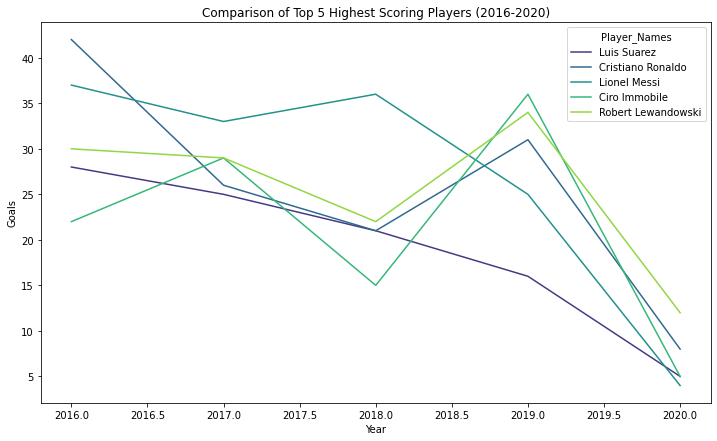

In [26]:
# Filter the dataset to include data for the years 2016-2020
data_years = df[df['Year'].between(2016, 2020)]

# Group the data by player names and sum the goals for each player
player_goals = data_years.groupby('Player_Names')['Goals'].sum().reset_index()

# Sort the players by total goals in descending order
top_players = player_goals.sort_values(by='Goals', ascending=False).head(5)

# Filter the dataset to include data for the top 5 players
top_5_data = data_years[data_years['Player_Names'].isin(top_players['Player_Names'])]

# Creating a line chart to show the comparison of the top 5 players
plt.figure(figsize=(12, 7))
sns.lineplot(data=top_5_data, x='Year', y='Goals', hue='Player_Names', palette='viridis')
plt.title("Comparison of Top 5 Highest Scoring Players (2016-2020)")
plt.xlabel('Year')
plt.ylabel('Goals')
plt.legend(title='Player_Names')
plt.show()